In [143]:
import nltk

In [144]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [145]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chetanuppara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [146]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/chetanuppara/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [147]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chetanuppara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [148]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chetanuppara/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [149]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chetanuppara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [150]:
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
from nltk import tokenize

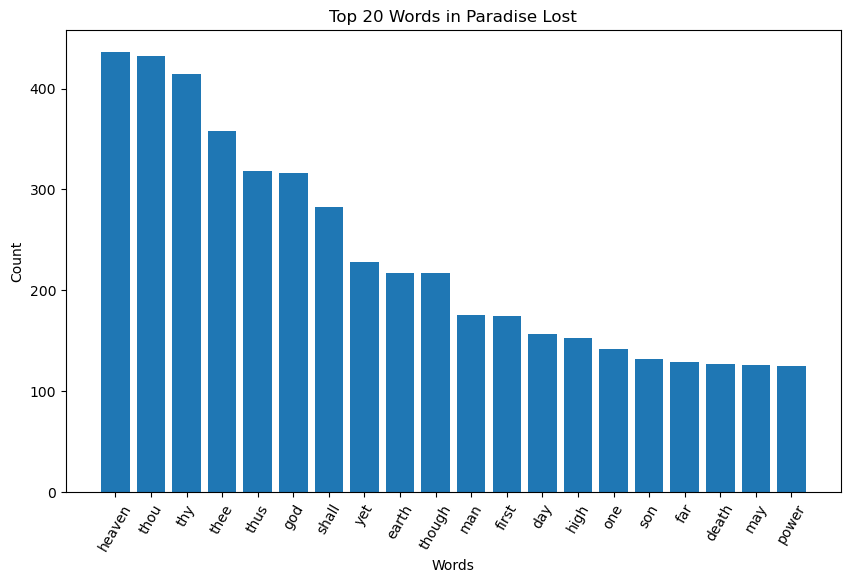

Top 20 Words: [('heaven', 436), ('thou', 432), ('thy', 414), ('thee', 358), ('thus', 318), ('god', 316), ('shall', 283), ('yet', 228), ('earth', 217), ('though', 217), ('man', 176), ('first', 175), ('day', 157), ('high', 153), ('one', 142), ('son', 132), ('far', 129), ('death', 127), ('may', 126), ('power', 125)]


In [151]:
#1

def paradise_missing():
    words = gutenberg.words('milton-paradise.txt')

    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('English'))
    
    processed_words = [
        lemmatizer.lemmatize(word.lower())
        for word in words
        if word.lower() not in stop_words
        and word.isalpha() 
        and len(word) > 2 
    ]

    word_counts = Counter(processed_words)

    top_words = word_counts.most_common(20)
    word_list = []
    count_list = []

    for word, count in top_words:
        word_list.append(word)
        count_list.append(count)
    plt.figure(figsize=(10, 6))
    plt.bar(word_list, count_list)
    plt.xticks(rotation=60)
    plt.title('Top 20 words')
    plt.ylabel('Count')
    plt.xlabel('Words')
    plt.show()

    return top_words

top_words = process_paradise_lost()
print("Top 20 Words:", top_words)

In [152]:
def extract(file_id):
    r = gutenberg.sents(file_id)
    c = [" ".join(sentence).strip() for sentence in r]
    return c

def catagorize(sentences, analyzer, pos_threshold=0.5, neg_threshold=-0.5):
    pos = []
    neg = []
    neutral = []
    
    for s in sentences:
        sentiment = analyzer.polarity_scores(s)
        compound = sentiment['compound']
        
        if compound > pos_threshold:
            pos.append((s, compound))

        elif compound < neg_threshold:
            neg.append((s, compound))

        else:
             neutral.append((s, sentiment['neu']))
    
    return pos, neg, neutral

def sort(p, n, neu):
    s_p = sorted(p, key = lambda i: i[1], reverse = True)
    s_n = sorted(n, key = lambda i: i[1])
    s_neutral = sorted(neu, key = lambda i: i[1], reverse = True)
    return s_p, s_n, s_neutral

def above_sent(s_p, s_n, s_neutral, top_n=5):

    print("5 most positive:")
    for sentence, score in s_p[:top_n]:
        print(f"• {sentence} (Compound Score: {score})")
    
    print("\n5 most negative:")
    for sentence, score in s_n[:top_n]:
        print(f"• {sentence} (Compound Score: {score})")
    
    print("\n5 most neutral:")
    for sentence, score in s_neutral[:top_n]:
        print(f"• {sentence} (Neutral Score: {score})")

def main():

    g_file = 'milton-paradise.txt'
    a = SentimentIntensityAnalyzer()
    b = extraction(g_file)
    positive, negative, neutral = categorizing(b, a)
    sorted_positive, sorted_negative, sorted_neutral = sorting(positive, negative, neutral)
    top_sentences(sorted_positive, sorted_negative, sorted_neutral, top_n=5)

if __name__ == "__main__":
    main()

5 most positive:
• Round he surveys ( and well might , where he stood So high above the circling canopy Of night ' s extended shade ,) from eastern point Of Libra to the fleecy star that bears Andromeda far off Atlantick seas Beyond the horizon ; then from pole to pole He views in breadth , and without longer pause Down right into the world ' s first region throws His flight precipitant , and winds with ease Through the pure marble air his oblique way Amongst innumerable stars , that shone Stars distant , but nigh hand seemed other worlds ; Or other worlds they seemed , or happy isles , Like those Hesperian gardens famed of old , Fortunate fields , and groves , and flowery vales , Thrice happy isles ; but who dwelt happy there He staid not to inquire : Above them all The golden sun , in splendour likest Heaven , Allured his eye ; thither his course he bends Through the calm firmament , ( but up or down , By center , or eccentrick , hard to tell , Or longitude ,) where the great luminar

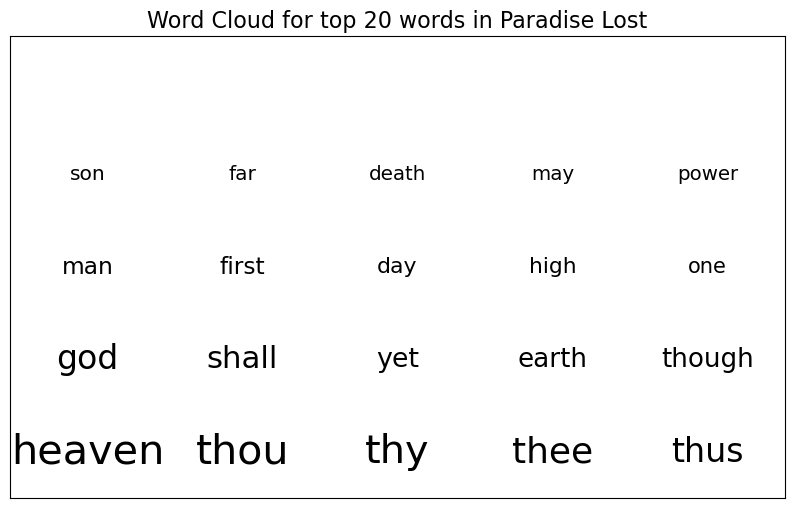

In [153]:
top_words = [
    ('heaven', 436), ('thou', 432), ('thy', 414), ('thee', 358), 
    ('thus', 318), ('god', 316), ('shall', 283), ('yet', 228), 
    ('earth', 217), ('though', 217), ('man', 176), ('first', 175), 
    ('day', 157), ('high', 153), ('one', 142), ('son', 132), 
    ('far', 129), ('death', 127), ('may', 126), ('power', 125)
]

def size_text(count):
    return 8 + count / 200 * 10

plt.figure(figsize=(10, 6))

for i, (word, count) in enumerate(top_words):
    plt.text(
        i % 5 * 20 + 10,  
        i // 5 * 20 + 10, 
        word,
        ha='center',
        va='center',
        size=text_size(count)
    )

plt.axis([0, 100, 0, 100]) 
plt.xticks([]) 
plt.yticks([]) 
plt.title("Word Cloud for top 20 words in Paradise Lost", fontsize=16)
plt.show()